In [1]:
import scipy.io
data = scipy.io.loadmat('exp/datasets/PICMUS/Vivo/picmus_vivo_1.mat')
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'data'])


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import scipy.io

# Load the data
data = scipy.io.loadmat('exp/datasets/PICMUS/Vivo/picmus_vivo_1.mat')
rf = data['data'].astype(np.float64)
print('RF shape:', rf.shape)
print('RF range: min =', np.min(rf), ', max =', np.max(rf))

RF shape: (1536, 128)
RF range: min = 4.4772416885052735e-09 , max = 0.7828459739685059


(512, 128)


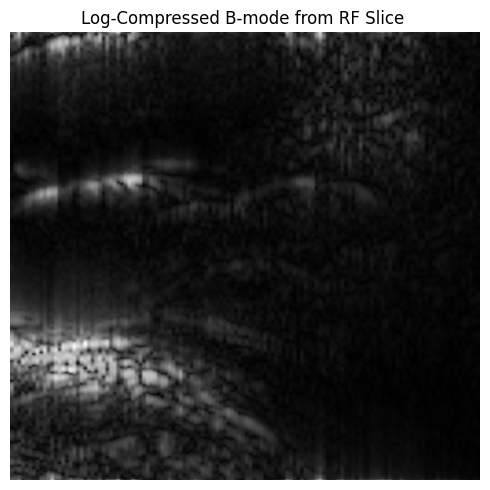

In [6]:
import numpy as np
import scipy.io
from scipy.signal import hilbert
import matplotlib.pyplot as plt

# Load the .mat file
carotid_data = scipy.io.loadmat('exp/datasets/PICMUS/Vivo/picmus_vivo_1.mat')
rf_data = carotid_data['data']

# Log compression baseline
LogB = 120

# Extract 512 rows starting from index 1000
rf_section = rf_data[100:100+512, :]

print(rf_section.shape)

# Apply Hilbert transform along depth axis
env = np.abs(hilbert(rf_section, axis=0))

# Log compression
log_env = np.log(env + LogB)

# Plot B-mode image
plt.figure(figsize=(5, 5))
plt.imshow(log_env, cmap='gray', aspect='auto')
plt.title('Log-Compressed B-mode from RF Slice ')
plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
H, W = rf_section.shape

# Step 1: Copy original into new 512×512 matrix
rf_filled = np.zeros((512, 512), dtype=rf_section.dtype)
rf_filled[:, :W] = rf_section

# Step 2: Fill remaining with flipped rightmost part
fill_width = 512 - W
rf_filled[:, W:] = np.fliplr(rf_section[:, -fill_width:])

# Step 3: Hilbert transform + log compression
LogB = 10
env = np.abs(hilbert(rf_filled, axis=0))
log_env = np.log(env + LogB)

# Plot the final 512×512 result
plt.figure(figsize=(6, 6))
plt.imshow(log_env, cmap='gray', aspect='auto')
plt.title('512×512 B-mode with Right Flip and Cropped')
plt.axis('on')
plt.tight_layout()
plt.show()

ValueError: could not broadcast input array from shape (512,128) into shape (512,384)